In [12]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
import os 
os.chdir('C:\Hieu 2019\Data Science\Projects\Illustrate AC\cluster graph')
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : C:\Hieu 2019\Data Science\Projects\Illustrate AC\cluster graph


In [14]:
# data source: http://emps.exeter.ac.uk/engineering/research/cws/resources/benchmarks/design-resiliance-pareto-fronts/data-files/
# 'graph1.inp'
filename='HAN.inp.txt'
with open(filename) as file:
    file_contents = file.read()
print(file_contents)

[TITLE]
Hanoi example by Fujiwara and Khang, Water Resources Research, 1990

[JUNCTIONS]
;ID              	Elev        	Demand      	Pattern         
 2               	0           	890         	                	;
 3               	0           	850         	                	;
 4               	0           	130         	                	;
 5               	0           	725         	                	;
 6               	0           	1005        	                	;
 7               	0           	1350        	                	;
 8               	0           	550         	                	;
 9               	0           	525         	                	;
 10              	0           	525         	                	;
 11              	0           	500         	                	;
 12              	0           	560         	                	;
 13              	0           	940         	                	;
 14              	0           	615         	                	;
 15              	0           	

In [15]:
# get pipe list from inp file  
with open(filename) as fp:  
    line = fp.readline()
    line_num=1
    start_end_num=[]
    lines=[]
    line_list=[]
    while line:
        lines.append(line)  #add that line to our list of lines.        
        line = fp.readline()
        
        if line=='[PIPES]\n':
            yes=1
            start_end_num.append(line_num)
        elif line=='[PUMPS]\n':
            yes=0
            start_end_num.append(line_num)
        try:
            if yes==1:
                line_list.append(line.split())                
        except:
            continue
        line_num+=1
# print(start_end_num)
# lines[35]
pipe_list=[]
for i in range(2,len(line_list)-1):
    pipe_list.append((int(line_list[i][1]),int(line_list[i][2])))

In [16]:
# get pipe list from inp file  
with open(filename) as fp:  
    line = fp.readline()
    line_num=1
    start_end_num=[]
    lines=[]
    line_list=[]
    while line:
        lines.append(line)  #add that line to our list of lines.
#         print(lines)        #print the list object.
        
        line = fp.readline()
        
        if line=='[COORDINATES]\n':
            yes=1
            start_end_num.append(line_num)
        elif line=='[VERTICES]\n':
            yes=0
            start_end_num.append(line_num)
        try:
            if yes==1:
                line_list.append(line.split())                
        except:
            continue
        line_num+=1
        
coordinates_dict={}
for i in range(2,len(line_list)-1):
    coordinates_dict.update([(int(line_list[i][0]),(float(line_list[i][1]),float(line_list[i][2])))])

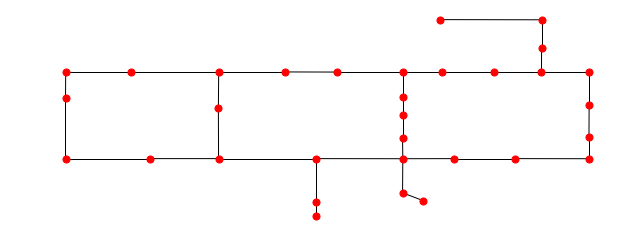

In [17]:
pos = coordinates_dict
X=nx.Graph()
X.add_nodes_from( coordinates_dict.keys() )
X.add_edges_from( pipe_list )

%matplotlib inline
plt.figure(3,figsize=(8,3)) 
figure=nx.draw(X,pos,node_size=50,node_color='r')

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


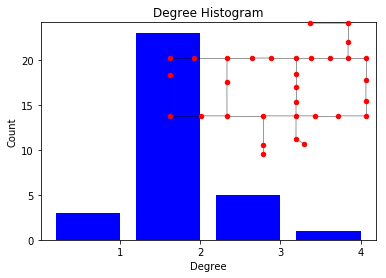

In [18]:
# network information
print(nx.info(X, n=None))

# node degree diagram. 
# Source code: https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
import collections

degree_sequence = sorted([d for n, d in X.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(X), key=len, reverse=True)[0]
plt.axis('off')
nx.draw_networkx_nodes(X, pos, node_size=20)
nx.draw_networkx_edges(X, pos, alpha=0.4)

plt.show()